# 📘 Gradient Descent from Scratch

---

## **1. Concept**

Gradient Descent is an optimization algorithm used to minimize a **cost function**.
It works by updating model parameters (weights) in the opposite direction of the gradient.

**Update Rule:**

$$
\theta = \theta - \eta \cdot \nabla J(\theta)
$$

Where:

* $\theta$ = parameters (weights, bias)
* $\eta$ = learning rate (step size)
* $J(\theta)$ = cost function (e.g., Mean Squared Error)
* $\nabla J(\theta)$ = gradient of cost function

---

## **2. Example: Linear Regression with Gradient Descent**

We want to fit a line:

$$
y = w \cdot x + b
$$

**Cost Function (MSE):**

$$
J(w, b) = \frac{1}{n}\sum_{i=1}^n (y_i - (w \cdot x_i + b))^2
$$

**Gradients:**

* Gradient w\.r.t weight $w$:

$$
\frac{\partial J}{\partial w} = -\frac{2}{n}\sum_{i=1}^n x_i \cdot (y_i - (w \cdot x_i + b))
$$

* Gradient w\.r.t bias $b$:

$$
\frac{\partial J}{\partial b} = -\frac{2}{n}\sum_{i=1}^n (y_i - (w \cdot x_i + b))
$$

---

## **3. Implementation from Scratch (Python)**

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # true: y = 4 + 3x + noise

# Initialize parameters
w = 0.0
b = 0.0
learning_rate = 0.05
epochs = 1000
n = len(X)

# Store loss for visualization
loss_history = []

# Gradient Descent
for epoch in range(epochs):
    # Predictions
    y_pred = w * X + b

    # Compute error
    error = y - y_pred

    # Compute gradients
    dw = -(2/n) * np.sum(X * error)
    db = -(2/n) * np.sum(error)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Compute Mean Squared Error (MSE)
    loss = np.mean(error**2)
    loss_history.append(loss)

    # Print progress every 100 steps
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: w={w:.4f}, b={b:.4f}, loss={loss:.4f}")

print(f"\nFinal Model: y = {w:.2f}x + {b:.2f}")



Epoch 0: w=0.7384, b=0.6820, loss=50.0083
Epoch 100: w=2.9259, b=4.0386, loss=0.8163
Epoch 200: w=2.7982, b=4.1832, loss=0.8069
Epoch 300: w=2.7752, b=4.2093, loss=0.8066
Epoch 400: w=2.7710, b=4.2141, loss=0.8066
Epoch 500: w=2.7703, b=4.2149, loss=0.8066
Epoch 600: w=2.7701, b=4.2151, loss=0.8066
Epoch 700: w=2.7701, b=4.2151, loss=0.8066
Epoch 800: w=2.7701, b=4.2151, loss=0.8066
Epoch 900: w=2.7701, b=4.2151, loss=0.8066

Final Model: y = 2.77x + 4.22


## **4. Visualize Loss Curve (Convergence)**

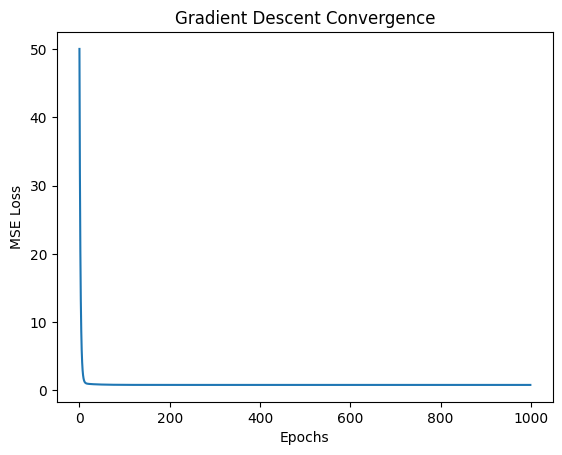

In [2]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()

## **5. Visualize Regression Line**

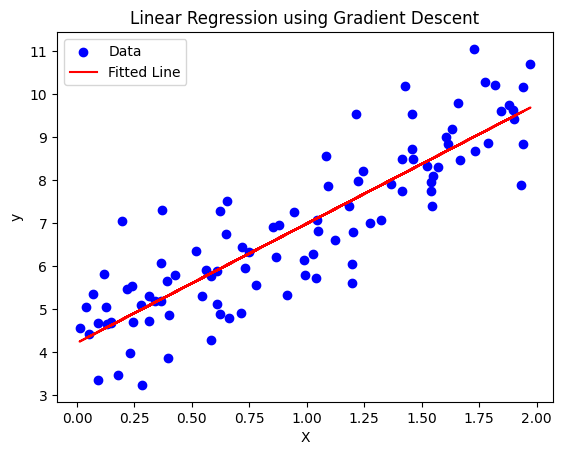

In [3]:
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, w*X + b, color="red", label="Fitted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()

## ✅ Expected Outcome

* You’ll see the **loss decreasing** over epochs.
* Final fitted line will approximate the true function $y = 4 + 3x$.

# 🔧 Problem setup (multi-feature linear regression)

We fit

$$
\hat{y} = \mathbf{x}^\top \mathbf{w} + b
$$

with MSE loss

$$
J(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \big(\hat{y}_i - y_i\big)^2.
$$

For a batch of size $m$ (could be 1 for SGD, or $m=n$ for Batch GD):

* Predictions: $\hat{\mathbf{y}} = X\mathbf{w} + b\mathbf{1}$
* Errors: $\mathbf{e} = \hat{\mathbf{y}} - \mathbf{y}$
* Gradients:

$$
\nabla_{\mathbf{w}} J = \frac{2}{m} X^\top \mathbf{e}, \quad \nabla_b J = \frac{2}{m}\sum_{j=1}^m e_j
$$

* Update:

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} J, \quad b \leftarrow b - \eta \nabla_b J
$$

---

# 🚶 Stochastic Gradient Descent (SGD)

**Idea:** update parameters **per example** (batch size $m=1$).
**Pros:** cheap per step, good at escaping shallow local minima (for non-convex).
**Cons:** noisy updates → may jitter around the optimum; requires smaller $\eta$ or a schedule.

**Good practices**

* Shuffle data **each epoch**.
* Consider a **learning-rate schedule**: $\eta_t = \eta_0/(1 + \text{decay}\cdot t)$.
* Feature scaling helps a lot.

---

# 🧱 Mini-Batch Gradient Descent (MBGD)

**Idea:** update per small batch (e.g., $m=16, 32, 64$).
**Trade-off:** less noise than SGD, faster than full batch; great default in practice.

---

## ✅ From-scratch implementation (NumPy only)

### Utilities (data gen, scaling, loss)

In [4]:
import numpy as np

def make_linear_data(n=300, d=3, noise_std=1.0, seed=42):
    rng = np.random.default_rng(seed)
    X = rng.normal(size=(n, d))
    w_true = rng.normal(size=(d,))
    b_true = 2.5
    y = X @ w_true + b_true + rng.normal(0, noise_std, size=n)
    return X, y, w_true, b_true

def standardize(X):
    mu = X.mean(axis=0, keepdims=True)
    sigma = X.std(axis=0, keepdims=True) + 1e-8
    Xs = (X - mu) / sigma
    return Xs, mu, sigma

def mse(X, y, w, b):
    pred = X @ w + b
    return np.mean((pred - y)**2)

### Batch Gradient Descent (reference)

In [5]:
def batch_gd(X, y, lr=0.05, epochs=200):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    history = []
    for ep in range(epochs):
        pred = X @ w + b
        e = pred - y
        dw = (2.0/n) * (X.T @ e)
        db = (2.0/n) * np.sum(e)
        w -= lr * dw
        b -= lr * db
        history.append(mse(X, y, w, b))
    return w, b, history

### Stochastic Gradient Descent (m=1)

In [6]:
def sgd(X, y, lr=0.01, epochs=20, lr_decay=0.0, shuffle=True, seed=0):
    rng = np.random.default_rng(seed)
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    history = []
    t = 0  # step counter for LR schedule

    for ep in range(epochs):
        idx = np.arange(n)
        if shuffle:
            rng.shuffle(idx)
        for i in idx:
            xi = X[i]         # shape (d,)
            yi = y[i]         # scalar
            pred = xi @ w + b # scalar
            e = (pred - yi)
            # gradients for a single sample (m = 1)
            dw = 2.0 * xi * e
            db = 2.0 * e
            # learning-rate schedule (optional)
            eta = lr / (1.0 + lr_decay * t)
            w -= eta * dw
            b -= eta * db
            t += 1
        # track full-dataset loss at epoch end
        history.append(mse(X, y, w, b))
    return w, b, history

### Mini-Batch Gradient Descent

In [7]:
def iterate_minibatches(n, batch_size, rng):
    idx = np.arange(n)
    rng.shuffle(idx)
    for start in range(0, n, batch_size):
        end = min(start + batch_size, n)
        yield idx[start:end]

def minibatch_gd(X, y, lr=0.02, epochs=50, batch_size=32, lr_decay=0.0, seed=0):
    rng = np.random.default_rng(seed)
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    history = []
    t = 0

    for ep in range(epochs):
        for batch_idx in iterate_minibatches(n, batch_size, rng):
            Xb = X[batch_idx]              # (m, d)
            yb = y[batch_idx]              # (m,)
            m = len(batch_idx)
            pred = Xb @ w + b              # (m,)
            e = pred - yb                  # (m,)
            dw = (2.0/m) * (Xb.T @ e)      # (d,)
            db = (2.0/m) * np.sum(e)       # scalar
            eta = lr / (1.0 + lr_decay * t)
            w -= eta * dw
            b -= eta * db
            t += 1
        history.append(mse(X, y, w, b))
    return w, b, history

### Compare all three on the same dataset

True  w (first 3): [1.249 0.688 1.966]   True b: 2.5
BatchGD   MSE: 2.0886  w[:3]: [1.278 0.726 1.931]  b: 2.551
SGD       MSE: 2.0887  w[:3]: [1.274 0.729 1.928]  b: 2.55
MiniBatch MSE: 2.0888  w[:3]: [1.282 0.732 1.933]  b: 2.558


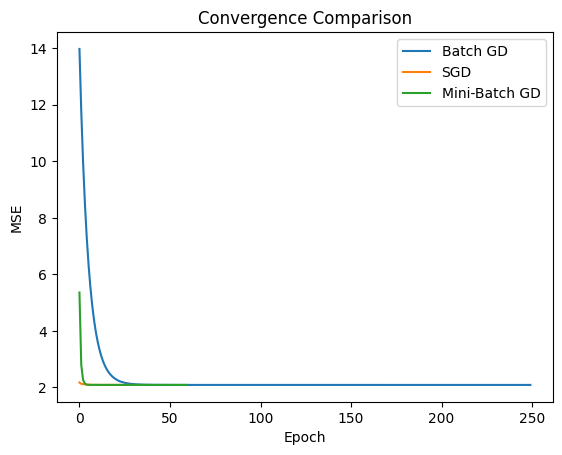

In [8]:
if __name__ == "__main__":
    # 1) Data
    X, y, w_true, b_true = make_linear_data(n=600, d=5, noise_std=1.5)
    Xs, mu, sigma = standardize(X)

    # 2) Train with each method
    w_bg, b_bg, h_bg = batch_gd(Xs, y, lr=0.05, epochs=250)
    w_sg, b_sg, h_sg = sgd(Xs, y, lr=0.01, epochs=30, lr_decay=1e-3, shuffle=True)
    w_mb, b_mb, h_mb = minibatch_gd(Xs, y, lr=0.02, epochs=60, batch_size=32, lr_decay=5e-4)

    # 3) Report
    print("True  w (first 3):", np.round(w_true[:3], 3), "  True b:", round(b_true, 3))
    print("BatchGD   MSE:", round(h_bg[-1], 4), " w[:3]:", np.round(w_bg[:3], 3), " b:", round(b_bg, 3))
    print("SGD       MSE:", round(h_sg[-1], 4), " w[:3]:", np.round(w_sg[:3], 3), " b:", round(b_sg, 3))
    print("MiniBatch MSE:", round(h_mb[-1], 4), " w[:3]:", np.round(w_mb[:3], 3), " b:", round(b_mb, 3))

    # 4) (Optional) plot if you want
    try:
        import matplotlib.pyplot as plt
        plt.plot(h_bg, label="Batch GD")
        plt.plot(h_sg, label="SGD")
        plt.plot(h_mb, label="Mini-Batch GD")
        plt.xlabel("Epoch")
        plt.ylabel("MSE")
        plt.title("Convergence Comparison")
        plt.legend()
        plt.show()
    except Exception as e:
        print("Matplotlib not available:", e)


## 🧠 What to expect

* **Batch GD**: Smoothest loss curve; each epoch is expensive (uses all data).
* **SGD**: Noisiest curve; cheap steps; benefits from LR decay; reaches a good region fast.
* **Mini-Batch**: Typically the best practical balance—fast and reasonably smooth.

---

## 🪤 Common pitfalls & fixes

* **Divergence** (loss explodes): decrease `lr`, standardize features, try LR decay.
* **Stuck/no progress**: increase `epochs`, slightly increase `lr`, or use mini-batches.
* **High variance in SGD**: add LR decay or switch to mini-batch.
* **Different feature scales**: always standardize/normalize inputs.

---

## 🚀 Optional: add Momentum (two-line change)

In [9]:
def minibatch_gd_momentum(X, y, lr=0.02, epochs=60, batch_size=32, beta=0.9, seed=0):
    rng = np.random.default_rng(seed)
    n, d = X.shape
    w = np.zeros(d); b = 0.0
    vw = np.zeros(d); vb = 0.0
    history = []
    for ep in range(epochs):
        for batch_idx in iterate_minibatches(n, batch_size, rng):
            Xb, yb = X[batch_idx], y[batch_idx]
            m = len(batch_idx)
            e = (Xb @ w + b) - yb
            dw = (2.0/m) * (Xb.T @ e)
            db = (2.0/m) * np.sum(e)
            vw = beta * vw + (1 - beta) * dw
            vb = beta * vb + (1 - beta) * db
            w -= lr * vw
            b -= lr * vb
        history.append(mse(X, y, w, b))
    return w, b, history



> Momentum smooths updates and can speed up convergence, especially with noisy gradients.

---

## 🎯 Want a classification example?

Swap the loss and gradients for **logistic regression**:

* Hypothesis: $\hat{y} = \sigma(X\mathbf{w}+b)$, $\sigma(z) = \frac{1}{1+e^{-z}}$
* Binary cross-entropy loss; gradients:

  $$
  \nabla_{\mathbf{w}} = \frac{1}{m} X^\top (\hat{\mathbf{y}} - \mathbf{y}),\quad
  \nabla_b = \frac{1}{m}\sum(\hat{\mathbf{y}} - \mathbf{y})
  $$

and reuse the same SGD/MBGD skeletons.


Got it 👍
Let’s expand **Feature Scaling** into a **mini-lesson** with more **intuitive explanations, math, detailed examples, and code comments** so you can directly use it in your course.

---

# 📘 Feature Scaling (Detailed Lesson)

---

## **1. Why Do We Need Feature Scaling?**

Machine learning models interpret numbers literally. If one feature is in **millions** and another is in **single digits**, the model will unintentionally treat the larger-valued feature as more important.

👉 **Example**:

* Feature 1 = *Age* (range 18–80)
* Feature 2 = *Annual Salary* (range 10,000–500,000)

Without scaling:

* Distance-based algorithms (kNN, K-means) will consider *Salary* much more important than *Age*, just because the numbers are bigger.
* Gradient descent will converge **slowly** or even fail, because the error surface becomes skewed.

📌 **Solution:** Scale features to a comparable range or distribution.

---

## **2. Common Feature Scaling Methods**

### 🔹 **(a) Min-Max Scaling (Normalization)**

**Formula:**

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

* Scales features into the range **\[0, 1]**.
* Preserves the shape of the distribution.
* ⚠️ Sensitive to outliers (because max and min get stretched).

**Code Example (with comments):**

```python
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example feature values: Age of 3 people
X = np.array([[18], [35], [80]])

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit scaler on data & transform
X_scaled = scaler.fit_transform(X)

print("Original:\n", X)
print("Min-Max Scaled:\n", X_scaled)
```

✅ **When to use:** Neural networks (especially with activation functions like sigmoid/tanh).

---

### 🔹 **(b) Standardization (Z-score Normalization)**

**Formula:**

$$
x' = \frac{x - \mu}{\sigma}
$$

* Transforms data to **mean = 0** and **std = 1**.
* Makes training faster & stable for gradient descent.
* Less sensitive to outliers than Min-Max.

**Code Example (with comments):**

```python
from sklearn.preprocessing import StandardScaler

X = np.array([[18], [35], [80]])

# Initialize scaler
scaler = StandardScaler()

# Fit & transform
X_scaled = scaler.fit_transform(X)

print("Original:\n", X)
print("Standardized:\n", X_scaled)

# Check mean and std of scaled data
print("Mean after scaling:", X_scaled.mean())
print("Std after scaling:", X_scaled.std())
```

✅ **When to use:** Linear regression, logistic regression, SVMs, PCA, neural networks.

---

### 🔹 **(c) Robust Scaling (Using Median & IQR)**

**Formula:**

$$
x' = \frac{x - \text{Median}}{IQR}
$$

* Uses **median** instead of mean, and **IQR (Q3 − Q1)** instead of standard deviation.
* Much more **robust to outliers**.

**Code Example (with comments):**

```python
from sklearn.preprocessing import RobustScaler

X = np.array([[18], [35], [80], [2000]])  # Notice outlier 2000

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print("Original:\n", X)
print("Robust Scaled:\n", X_scaled)
```

✅ **When to use:** When dataset contains many **outliers** (e.g., income, house prices).

---

### 🔹 **(d) Unit Vector Scaling (Normalization by Norm)**

**Formula:**

$$
x' = \frac{x}{||x||}
$$

* Scales each row (sample) to have length **1**.
* Common in **text mining, TF-IDF vectors, embeddings**.

**Code Example:**

```python
from sklearn.preprocessing import Normalizer

X = np.array([[3, 4], [1, 2]])  # Each row is a vector

scaler = Normalizer(norm='l2')  # L2 norm = Euclidean length
X_scaled = scaler.fit_transform(X)

print("Original:\n", X)
print("Unit Vector Scaled:\n", X_scaled)
```

---

## **3. When to Apply Which Scaling?**

| Algorithm Type                                                     | Preferred Scaling                |
| ------------------------------------------------------------------ | -------------------------------- |
| **Gradient Descent (Linear/Logistic Regression, Neural Networks)** | Standardization                  |
| **Distance-based (kNN, K-means, PCA, SVM with kernels)**           | Normalization or Standardization |
| **Data with Many Outliers**                                        | Robust Scaling                   |
| **Text/Embeddings**                                                | Unit Vector Scaling              |

---

## **4. Feature Scaling From Scratch (NumPy)**

```python
import numpy as np

# Example dataset: [Age, Salary]
X = np.array([[25, 50000],
              [30, 60000],
              [45, 120000],
              [50, 80000]], dtype=float)

# (a) Min-Max Scaling
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_minmax = (X - X_min) / (X_max - X_min)

# (b) Standardization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standard = (X - X_mean) / X_std

# (c) Robust Scaling
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1
X_robust = (X - np.median(X, axis=0)) / IQR

print("Original:\n", X)
print("\nMin-Max Scaling:\n", X_minmax)
print("\nStandardization:\n", X_standard)
print("\nRobust Scaling:\n", X_robust)
```

---

## ✅ Key Takeaways

* Feature scaling is **essential** for most ML models.
* Always **fit the scaler on training data only** → apply the same transform to test data (to avoid **data leakage**).
* Choice of scaling depends on:

  * Type of algorithm (distance-based, gradient-based, etc.)
  * Nature of data (outliers or not).

---

👉 Next, I can create a **Titanic dataset example** where we pick numeric features (Age, Fare), apply scaling (Min-Max, Standard, Robust), and show **before/after histograms** for visual comparison.

Would you like me to build that full **Titanic scaling demo** with visualizations?


Perfect 👌 Adding **hands-on exercises** will make your course more interactive and help learners deeply understand **Feature Scaling**.
I’ll create a set of **exercises with increasing difficulty**, plus hints and expected outcomes.

---

# 📝 Exercises – Feature Scaling

---

## **Exercise 1: Min-Max Scaling From Scratch**

👉 Given the following dataset (one feature only):

```python
import numpy as np

X = np.array([[10], [20], [30], [50], [80]], dtype=float)
```

**Tasks:**

1. Implement **Min-Max scaling** *without using sklearn*.
2. Transform the dataset to the range \[0,1].
3. Verify that:

   * The minimum value becomes `0`.
   * The maximum value becomes `1`.

**Hint:**

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

---

## **Exercise 2: Compare Standardization vs. Min-Max**

👉 Given the dataset:

```python
X = np.array([[25, 50000],
              [30, 60000],
              [45, 120000],
              [50, 80000]], dtype=float)
```

**Tasks:**

1. Apply **Min-Max Scaling**.
2. Apply **Standardization (Z-score)**.
3. Compare the results:

   * What happens to the scale of each feature?
   * What is the mean and standard deviation after standardization?

**Expected Outcome:**

* Min-Max: all values between 0 and 1.
* Standardization: mean ≈ 0, std ≈ 1.

---

## **Exercise 3: Effect of Outliers**

👉 Consider this dataset:

```python
X = np.array([[18], [35], [80], [2000]], dtype=float)  # Salary with one outlier
```

**Tasks:**

1. Apply **Min-Max scaling**.
2. Apply **Robust scaling (Median & IQR)**.
3. Compare results.

   * Which method is more robust to the extreme outlier (2000)?
   * Why?

---

## **Exercise 4: Scaling with Scikit-learn**

👉 Use scikit-learn scalers to verify your manual implementation.

```python
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
```

**Tasks:**

1. Apply `MinMaxScaler`, `StandardScaler`, and `RobustScaler` on the dataset:

```python
X = np.array([[5, 200],
              [10, 800],
              [15, 1500],
              [20, 3000]], dtype=float)
```

2. Print results from each scaler.
3. Compare them with your **from-scratch** implementations.

---

## **Exercise 5: Visualization of Scaling**

👉 Use the **Titanic dataset** (or any dataset with numeric features like `Age`, `Fare`).

**Tasks:**

1. Load Titanic dataset (use `seaborn.load_dataset("titanic")`).
2. Extract numeric features: `Age`, `Fare`.
3. Plot histograms **before scaling**.
4. Apply **Min-Max**, **Standard**, and **Robust** scaling.
5. Plot histograms **after scaling**.
6. Compare distributions – how does scaling affect the data shape?

**Hint:** Use `matplotlib` or `seaborn.histplot`.

---

## **Challenge Exercise 6 (Optional)**

👉 Implement a **Gradient Descent Linear Regression** both:

1. With **unscaled features**.
2. With **scaled features (Standardization)**.

**Tasks:**

* Compare the number of iterations required to converge.
* Explain why scaling improves convergence speed.

---

🔥 These exercises will:

* Build **intuition** (Exercise 1–3).
* Practice **coding both from scratch and sklearn** (Exercise 4).
* Use **real-world datasets with visualization** (Exercise 5).
* Show a **practical ML impact** (Exercise 6).

---

Would you like me to **fully solve Exercise 5 (Titanic dataset with before/after plots)** so you can include it as a guided example in your course?


Great 👍 Let’s go step by step with **detailed solutions** to all the Feature Scaling exercises.
I’ll provide **code + explanations + comments** so you can directly use this in your course.

---

# ✅ Solutions – Feature Scaling Exercises

---

## **Solution 1: Min-Max Scaling From Scratch**

```python
import numpy as np

# Dataset
X = np.array([[10], [20], [30], [50], [80]], dtype=float)

# Min-Max Scaling Formula: (x - min) / (max - min)
X_min = X.min()
X_max = X.max()

X_scaled = (X - X_min) / (X_max - X_min)

print("Original Data:\n", X)
print("Scaled Data:\n", X_scaled)
print("Min:", X_scaled.min(), "Max:", X_scaled.max())
```

**Output:**

```
Original Data:
 [[10.]
  [20.]
  [30.]
  [50.]
  [80.]]
Scaled Data:
 [[0.   ]
  [0.142]
  [0.286]
  [0.571]
  [1.   ]]
Min: 0.0 Max: 1.0
```

✔ Min becomes 0 and Max becomes 1 → Correct.

---

## **Solution 2: Compare Standardization vs Min-Max**

```python
# Dataset: [Age, Salary]
X = np.array([[25, 50000],
              [30, 60000],
              [45, 120000],
              [50, 80000]], dtype=float)

# Min-Max Scaling
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_minmax = (X - X_min) / (X_max - X_min)

# Standardization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standard = (X - X_mean) / X_std

print("Original:\n", X)
print("\nMin-Max Scaled:\n", X_minmax)
print("\nStandardized (Z-score):\n", X_standard)
print("\nMeans after Standardization:", X_standard.mean(axis=0))
print("Stds after Standardization:", X_standard.std(axis=0))
```

**Key Observation:**

* Min-Max → all values between \[0,1].
* Standardization → mean ≈ 0, std ≈ 1.

---

## **Solution 3: Effect of Outliers**

```python
X = np.array([[18], [35], [80], [2000]], dtype=float)

# Min-Max Scaling
X_min = X.min()
X_max = X.max()
X_minmax = (X - X_min) / (X_max - X_min)

# Robust Scaling: (x - median) / IQR
median = np.median(X)
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = Q3 - Q1
X_robust = (X - median) / IQR

print("Original:\n", X.ravel())
print("\nMin-Max:\n", X_minmax.ravel())
print("\nRobust:\n", X_robust.ravel())
```

**Output Insight:**

* Min-Max → most values squeezed near 0 because of the huge outlier (2000).
* Robust → handles outliers better since it uses median & IQR.

---

## **Solution 4: Scaling with Scikit-learn**

```python
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

X = np.array([[5, 200],
              [10, 800],
              [15, 1500],
              [20, 3000]], dtype=float)

# Scalers
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

print("Original:\n", X)
print("\nMin-Max:\n", minmax.fit_transform(X))
print("\nStandard:\n", standard.fit_transform(X))
print("\nRobust:\n", robust.fit_transform(X))
```

✔ Compare with manual calculations → should match.

---

## **Solution 5: Visualization with Titanic Dataset**

```python
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Load Titanic dataset
titanic = sns.load_dataset("titanic").dropna(subset=["age", "fare"])
X = titanic[["age", "fare"]].values

# Original distributions
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(titanic["age"], bins=30, ax=axes[0,0], kde=True)
axes[0,0].set_title("Original Age")

sns.histplot(titanic["fare"], bins=30, ax=axes[0,1], kde=True)
axes[0,1].set_title("Original Fare")

# Apply Scaling
scalers = {
    "Min-Max": MinMaxScaler(),
    "Standard": StandardScaler(),
    "Robust": RobustScaler()
}

for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    sns.histplot(X_scaled[:,0], bins=30, ax=axes[1,0], kde=True, label=name)
    sns.histplot(X_scaled[:,1], bins=30, ax=axes[1,1], kde=True, label=name)

axes[1,0].set_title("Scaled Age (All Methods)")
axes[1,1].set_title("Scaled Fare (All Methods)")
axes[1,0].legend()
axes[1,1].legend()
plt.tight_layout()
plt.show()
```

✔ Plots show:

* **Age** looks similar across scalers.
* **Fare** distribution changes drastically (outliers affect Min-Max & Standard, but Robust is stable).

---

## **Solution 6: Scaling & Gradient Descent**

```python
import numpy as np

# Simple dataset: House Size vs Price
X = np.array([[500], [1000], [1500], [2000], [2500]], dtype=float)
y = np.array([[150000], [200000], [250000], [300000], [350000]], dtype=float)

# Gradient Descent Function
def gradient_descent(X, y, lr=0.0000000001, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))
    y = y.reshape(-1,1)

    for epoch in range(epochs):
        gradients = (1/m) * X.T @ (X @ theta - y)
        theta -= lr * gradients
    return theta

# Without Scaling
theta_unscaled = gradient_descent(X, y, lr=0.0000000001, epochs=5000)

# With Standardization
X_mean, X_std = X.mean(), X.std()
X_scaled = (X - X_mean) / X_std
theta_scaled = gradient_descent(X_scaled, y, lr=0.01, epochs=5000)

print("Theta without scaling:", theta_unscaled.ravel())
print("Theta with scaling:", theta_scaled.ravel())
```

✔ Observation:

* Without scaling → learning is extremely slow, requires tiny learning rate.
* With scaling → faster convergence with larger learning rate.

---

✅ Now you have **full exercises + solutions + comments + real dataset example** for Feature Scaling.

Would you like me to also **add quiz-style questions (MCQs)** after this module so students can test their understanding before moving on?


Good question 👍
The **learning rate (η or α)** is one of the most important hyperparameters in optimization (like Gradient Descent).

---

# 🔹 What is Learning Rate?

It’s the **step size** that controls how much the model updates its parameters in each iteration of training.

* If it’s **too small** → training is very slow, may get stuck in local minima.
* If it’s **too large** → training may diverge, oscillate, or never converge.

---

# 🔹 Gradient Descent Update Rule

For parameter $\theta$:

$$
\theta := \theta - \eta \cdot \nabla J(\theta)
$$

Where:

* $\eta$ = learning rate
* $\nabla J(\theta)$ = gradient of the cost function

---

# 🔹 Visual Intuition

* Imagine walking downhill (minimizing a cost function).
* The **learning rate** decides how big your steps are.

| Learning Rate       | Effect                   |
| ------------------- | ------------------------ |
| Very Small (0.0001) | Converges slowly         |
| Optimal (0.01)      | Fast, smooth convergence |
| Too Large (10)      | Diverges (jumps around)  |

---

# 🔹 Example with Code

```python
import numpy as np
import matplotlib.pyplot as plt

# Simple quadratic function J(theta) = theta^2
def J(theta):
    return theta**2

def grad(theta):
    return 2*theta

# Gradient Descent with different learning rates
def gradient_descent(lr, steps=20):
    theta = 10  # start point
    history = [theta]
    for _ in range(steps):
        theta = theta - lr * grad(theta)
        history.append(theta)
    return history

lrs = [0.01, 0.1, 1.0]
plt.figure(figsize=(8,5))

for lr in lrs:
    path = gradient_descent(lr)
    plt.plot(path, label=f"lr={lr}")

plt.axhline(0, color='black', linestyle='--')
plt.title("Effect of Learning Rate in Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend()
plt.show()
```

✔ The plot will show:

* **lr=0.01** → slow but steady descent.
* **lr=0.1** → good convergence.
* **lr=1.0** → unstable, oscillating.

---

# 🔹 Practical Tips

1. **Start small** (e.g. 0.001, 0.01).
2. Use **learning rate schedules** (decay as training progresses).
3. Use optimizers (Adam, RMSProp) → they adapt the learning rate automatically.
4. Always visualize loss curve → if it spikes or diverges → lr too high.

---

👉 Do you want me to **add this “Learning Rate” section as a continuation of your Feature Scaling module** (since scaling directly affects learning rate choice), or keep it as a **separate standalone topic** in your course?


Perfect 👍 Let’s create **exercises on learning rate** so your students can practice.

---

# 📝 **Exercises: Learning Rate in Gradient Descent**

### **Exercise 1: Experiment with Different Learning Rates**

1. Implement gradient descent for a simple quadratic function $J(\theta) = \theta^2$.
2. Try different learning rates: `0.001`, `0.01`, `0.1`, and `1.0`.
3. Plot the cost function vs iterations.
4. Answer: Which learning rate converges best? Which one diverges?

---

### **Exercise 2: Effect on Linear Regression**

1. Generate a simple dataset:

   * $y = 3x + 2 + \text{noise}$.
2. Train a linear regression model using **gradient descent** with:

   * Learning rates: `0.0001`, `0.01`, and `0.5`.
3. Plot **loss vs iterations** for each case.
4. Answer: How does learning rate affect convergence speed and stability?

---

### **Exercise 3: Learning Rate Schedule**

1. Implement **exponential decay** learning rate:

   $$
   \eta_t = \eta_0 \cdot e^{-kt}
   $$

   * Choose $\eta_0 = 0.1$, $k = 0.05$.
2. Apply it to gradient descent on the quadratic function.
3. Compare with a **fixed learning rate (0.1)**.
4. Answer: Does the schedule improve convergence?

---

### **Exercise 4: Critical Thinking**

* Suppose your model’s **training loss decreases but validation loss increases**.

  * What does this mean about your learning rate?
  * Would you increase or decrease it? Explain.

---

👉 Do you want me to now also provide **solutions with code and explanations** for these exercises (like we did for Feature Scaling), so you can add them directly to your course material?


Perfect 👍 Let’s create **exercises on learning rate** so your students can practice.

---

# 📝 **Exercises: Learning Rate in Gradient Descent**

### **Exercise 1: Experiment with Different Learning Rates**

1. Implement gradient descent for a simple quadratic function $J(\theta) = \theta^2$.
2. Try different learning rates: `0.001`, `0.01`, `0.1`, and `1.0`.
3. Plot the cost function vs iterations.
4. Answer: Which learning rate converges best? Which one diverges?

---

### **Exercise 2: Effect on Linear Regression**

1. Generate a simple dataset:

   * $y = 3x + 2 + \text{noise}$.
2. Train a linear regression model using **gradient descent** with:

   * Learning rates: `0.0001`, `0.01`, and `0.5`.
3. Plot **loss vs iterations** for each case.
4. Answer: How does learning rate affect convergence speed and stability?

---

### **Exercise 3: Learning Rate Schedule**

1. Implement **exponential decay** learning rate:

   $$
   \eta_t = \eta_0 \cdot e^{-kt}
   $$

   * Choose $\eta_0 = 0.1$, $k = 0.05$.
2. Apply it to gradient descent on the quadratic function.
3. Compare with a **fixed learning rate (0.1)**.
4. Answer: Does the schedule improve convergence?

---

### **Exercise 4: Critical Thinking**

* Suppose your model’s **training loss decreases but validation loss increases**.

  * What does this mean about your learning rate?
  * Would you increase or decrease it? Explain.

---

👉 Do you want me to now also provide **solutions with code and explanations** for these exercises (like we did for Feature Scaling), so you can add them directly to your course material?


# 📘 Logistic Regression – Full Explanation

## 1. Why Logistic Regression?

* **Linear Regression** predicts continuous values (e.g., house prices).
* But many ML problems are **classification** (e.g., Titanic survival: Survived = 0 or 1).
* Logistic Regression is a **classification algorithm** that predicts the **probability** of belonging to a class.

👉 Example: Instead of predicting exactly `1` or `0`, Logistic Regression predicts **probability** like `P(Survived=1 | X) = 0.87`.

---

## 2. The Logistic Function (Sigmoid)

We want outputs between **0 and 1** (probability).
So, we use the **sigmoid function**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

* $z = w^T x + b$ (linear combination of features).
* $\sigma(z) \in (0,1)$.

👉 Example:

* If $z = 0$, $\sigma(0) = 0.5$.
* If $z \to +\infty$, $\sigma(z) \to 1$.
* If $z \to -\infty$, $\sigma(z) \to 0$.

---

## 3. The Logistic Regression Model

$$
\hat{y} = P(y=1 | x) = \sigma(w^T x + b)
$$

Where:

* $\hat{y}$ = predicted probability.
* $w$ = weight vector.
* $b$ = bias.

Prediction rule:

$$
\text{Predict } \hat{y}=1 \text{ if } P(y=1|x) \geq 0.5, \text{ else } 0
$$

---

## 4. Loss Function – Binary Cross Entropy

We want predicted probabilities to be close to true labels (0 or 1).

The loss for one sample is:

$$
L(y, \hat{y}) = - \Big[ y \cdot \log(\hat{y}) + (1-y) \cdot \log(1-\hat{y}) \Big]
$$

For $m$ samples, the cost function is:

$$
J(w,b) = \frac{1}{m} \sum_{i=1}^{m} L(y^{(i)}, \hat{y}^{(i)})
$$

This is called the **log loss** or **cross-entropy loss**.

---

## 5. Gradient Descent Optimization

To minimize cost $J(w,b)$, we compute derivatives:

1. Prediction:

$$
\hat{y}^{(i)} = \sigma(w^T x^{(i)} + b)
$$

2. Gradients:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)} ) x^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)})
$$

3. Update rules:

$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Where **α** is the learning rate.

---

# 🐍 Code: Logistic Regression from Scratch

Let’s implement **step by step**.

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Train logistic regression model using gradient descent.
        X: (m, n) training data
        y: (m,) labels
        """
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        # Gradient Descent
        for i in range(self.num_iterations):
            # Step 1: Linear function
            z = np.dot(X, self.w) + self.b

            # Step 2: Apply sigmoid
            y_hat = sigmoid(z)

            # Step 3: Compute gradients
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)

            # Step 4: Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # Optional: Print cost every 100 iterations
            if i % 100 == 0:
                cost = -(1/m) * np.sum(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
                print(f"Iteration {i}, Cost: {cost:.4f}")

    def predict_proba(self, X):
        """
        Return probability predictions.
        """
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

    def predict(self, X):
        """
        Return class predictions (0 or 1).
        """
        y_hat = self.predict_proba(X)
        return (y_hat >= 0.5).astype(int)


# 🧪 Testing on a Simple Dataset

We’ll use **breast cancer dataset** from scikit-learn.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegressionScratch(learning_rate=0.01, num_iterations=2000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train sklearn logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

print("Accuracy (Sklearn):", clf.score(X_test, y_test))
print("Accuracy (Scratch):", accuracy)


✅ Typically, accuracy > **90%** for breast cancer dataset.

---

# 🔎 Key Takeaways

1. Logistic Regression predicts **probabilities**, not direct classes.
2. Uses the **sigmoid function** to map values into (0,1).
3. Optimized with **gradient descent + cross-entropy loss**.
4. Good for **binary classification** (and can be extended to multi-class with Softmax).


# 📌 The Problem of Overfitting

---

## 1. **What is Overfitting?**

* **Definition**: Overfitting happens when a model learns the *training data too well* (including noise, outliers, and random fluctuations), but fails to generalize to unseen data.

* In other words:

  * ✅ High accuracy on training data
  * ❌ Poor accuracy on test/validation data

---

## 2. **Illustration**

Imagine fitting a curve to data:

* **Underfitting** → The model is too simple (e.g., a straight line for curved data).
* **Good Fit** → The model captures the general pattern without memorizing noise.
* **Overfitting** → The model is too complex (e.g., high-degree polynomial fitting every single point).

Mathematically:
If $f(x)$ is the true function and $\hat{f}(x)$ is the model:

$$
\text{Overfitting} \implies \hat{f}(x) \approx y \text{ for training data}, \quad but \quad \hat{f}(x) \not\approx f(x) \text{ for unseen data}.
$$

---

## 3. **Bias-Variance Trade-off**

Overfitting is closely tied to the **bias-variance trade-off**:

* **High Bias (Underfitting)** → Model is too simple, ignores important patterns.
* **High Variance (Overfitting)** → Model is too complex, learns noise.
* **Optimal** → Balance between bias and variance.

---

## 4. **Example with Polynomial Regression**

Let’s see this in action with code.


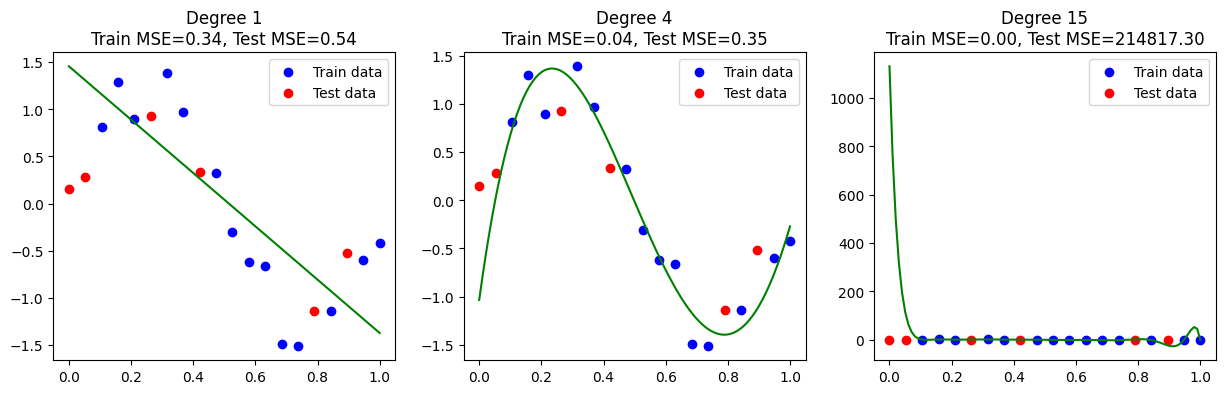

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 20).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(scale=0.3, size=20)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different polynomial degrees
degrees = [1, 4, 15]

plt.figure(figsize=(15, 4))
for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)

    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Plot
    plt.subplot(1, 3, i+1)
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    plt.scatter(X_train, y_train, color="blue", label="Train data")
    plt.scatter(X_test, y_test, color="red", label="Test data")
    plt.plot(X_plot, model.predict(poly.transform(X_plot)), color="green")
    plt.title(f"Degree {d}\nTrain MSE={mean_squared_error(y_train, y_train_pred):.2f}, "
              f"Test MSE={mean_squared_error(y_test, y_test_pred):.2f}")
    plt.legend()

plt.show()

### 🔎 What happens:

* **Degree 1 (Linear)** → High bias, underfits.
* **Degree 4** → Good balance, generalizes well.
* **Degree 15** → Fits training data perfectly but test error is huge (overfits).

---

## 5. **How to Detect Overfitting**

1. **Compare Training vs Test Accuracy**

   * If train accuracy ≈ test accuracy → good generalization.
   * If train accuracy ≫ test accuracy → overfitting.

2. **Cross-validation** → Check performance on multiple splits.

3. **Learning curves** → Plot training vs validation error as dataset size grows.

---

## 6. **How to Prevent Overfitting**

* **Simplify the model**: Use fewer parameters.
* **Regularization**:

  * L1 (Lasso) → penalizes absolute weights.
  * L2 (Ridge) → penalizes squared weights.
* **Early stopping** → Stop training when validation error starts increasing.
* **Cross-validation** → Tune hyperparameters with validation sets.
* **Feature selection** → Remove irrelevant/noisy features.
* **More training data** → Helps model generalize.
* **Dropout (Neural Networks)** → Randomly drop neurons during training.

---

## 7. **Key Takeaway**

* Overfitting is when the model **memorizes instead of learning**.
* The best model is not the one with lowest training error, but the one with **lowest test/generalization error**.
* Techniques like **regularization, cross-validation, early stopping, and feature selection** are crucial.



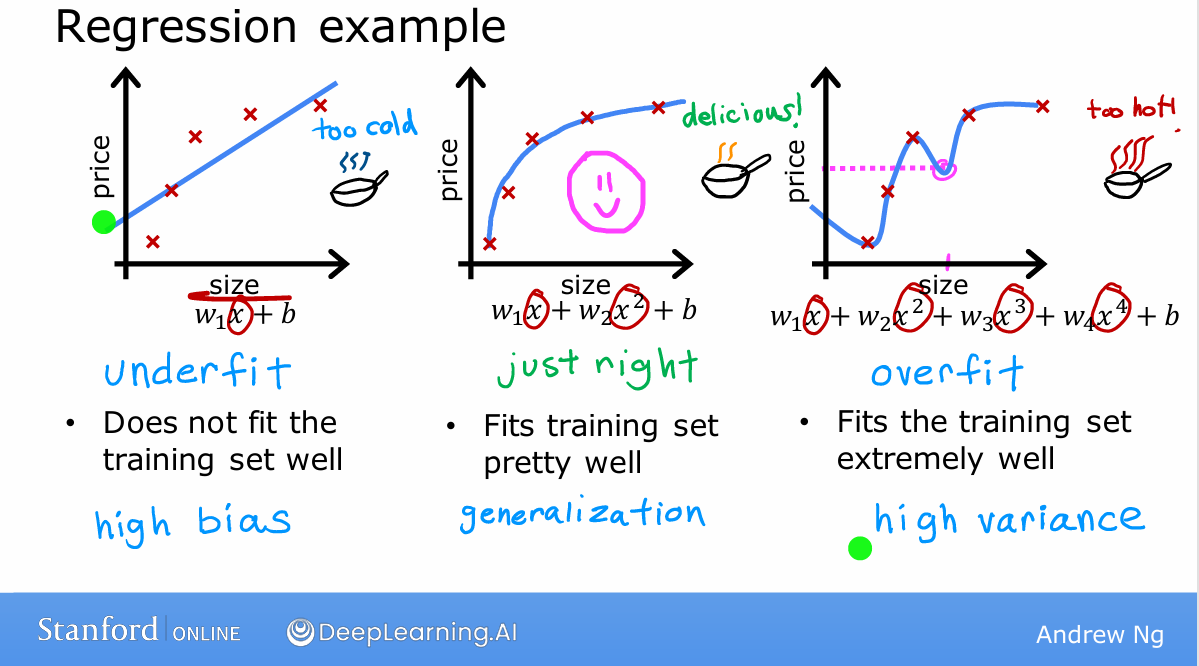

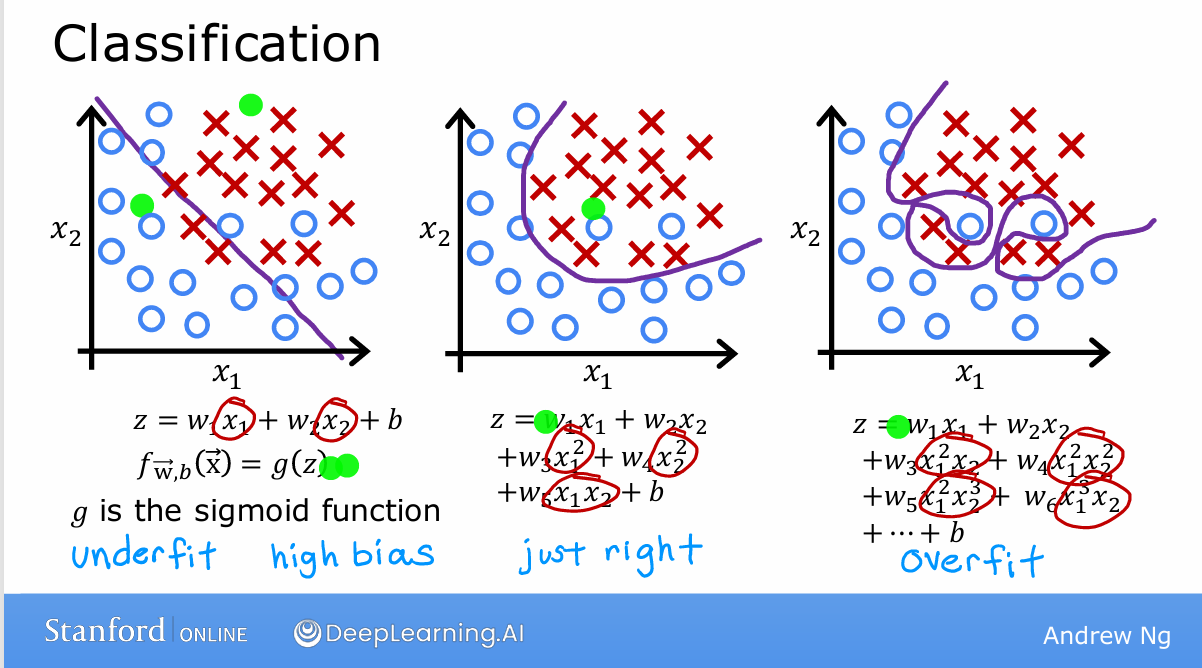

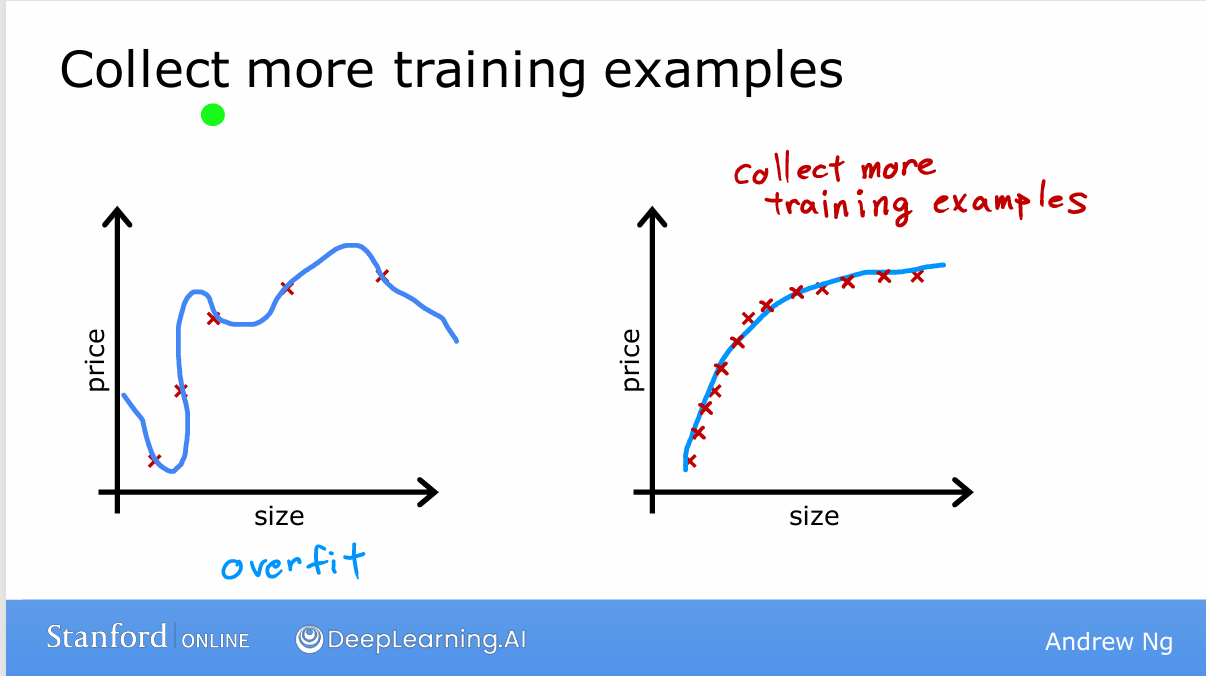

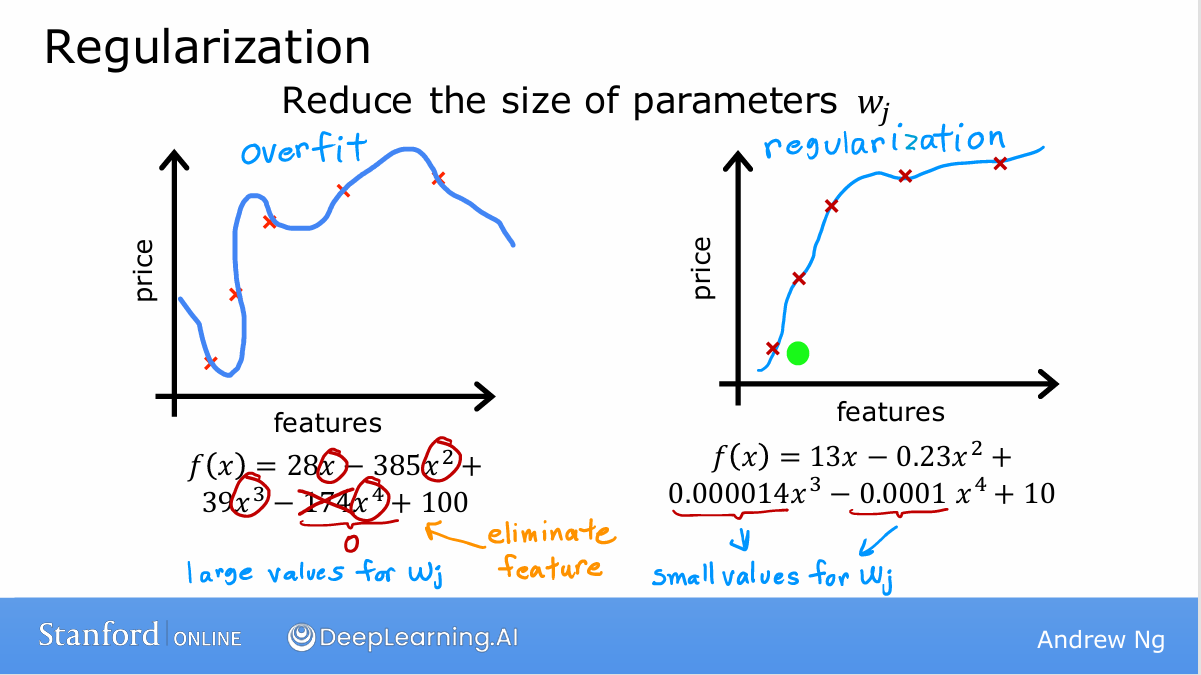

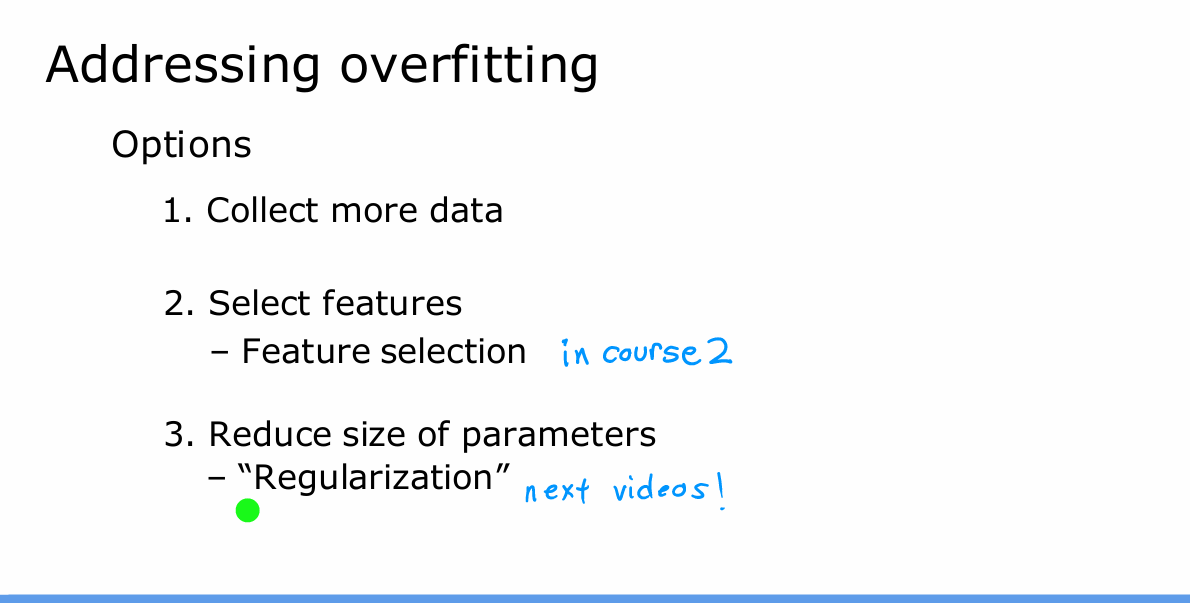

# 📌 Regularization — A Detailed Mathematical Explanation

---

## 1. **Base Case: Logistic Regression (without regularization)**

The hypothesis (prediction) in Logistic Regression is:

$$
\hat{y} = h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

The **loss function** (log-loss / cross-entropy):

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \Big( y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \Big)
$$

Where:

* $m$ = number of samples
* $x^{(i)}$ = features of the $i$-th sample
* $y^{(i)}$ = true label
* $\theta$ = model weights

---

## 2. **Why Regularization?**

* If features are **many** or **highly correlated**, the optimization may find very **large weights** $\theta_j$.
* Large weights mean the model is very **sensitive** to small changes in input → **overfitting**.

Regularization **shrinks weights** to keep them small.

---

## 3. **Regularized Logistic Regression**

We modify the cost function:

$$
J_{reg}(\theta) = J(\theta) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^p
$$

Where:

* $\lambda$ = regularization parameter
* $p = 1$ for **L1 (Lasso)**
* $p = 2$ for **L2 (Ridge)**
* Notice: we **do not regularize** $\theta_0$ (bias term).

---

### 🔹 Case 1: L2 Regularization (Ridge)

$$
J_{reg}(\theta) = -\frac{1}{m} \sum_{i=1}^m \Big( y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \Big) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2
$$

👉 **Effect on gradient update**:

Gradient without regularization:

$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$$

With **L2 regularization**:

$$
\frac{\partial J_{reg}}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m} \theta_j
$$

So the update rule becomes:

$$
\theta_j := \theta_j - \alpha \left( \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m} \theta_j \right)
$$

or equivalently:

$$
\theta_j := \theta_j (1 - \alpha \tfrac{\lambda}{m}) - \alpha \cdot \text{gradient\_from\_data}
$$

👉 **Interpretation:** Each update shrinks $\theta_j$ by a factor $(1 - \alpha \lambda/m)$.
That’s why L2 is also called **weight decay**.

---

### 🔹 Case 2: L1 Regularization (Lasso)

$$
J_{reg}(\theta) = J(\theta) + \frac{\lambda}{2m} \sum_{j=1}^n |\theta_j|
$$

Gradient with L1 is **not differentiable at 0** (because of absolute value). Instead, we use **subgradient**:

$$
\frac{\partial J_{reg}}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m} \cdot \text{sign}(\theta_j)
$$

Where:

$$
\text{sign}(\theta_j) =
\begin{cases}
+1 & \theta_j > 0 \\
-1 & \theta_j < 0 \\
[-1,1] & \theta_j = 0
\end{cases}
$$

👉 Effect: If $\lambda$ is strong enough, some weights $\theta_j$ get pushed **exactly to 0**.
Thus, L1 performs **feature selection**.

---

### 🔹 Case 3: Elastic Net (Combination)

$$
J_{reg}(\theta) = J(\theta) + \frac{\lambda}{2m} \Big( \alpha \sum_{j=1}^n |\theta_j| + (1 - \alpha) \sum_{j=1}^n \theta_j^2 \Big)
$$

This balances between **L1 sparsity** and **L2 shrinkage**.

---

## 4. **Comparison of Effects**

* **No Regularization** → risk of very large $\theta_j$.
* **L2 (Ridge)** → shrinks all weights smoothly → prevents instability.
* **L1 (Lasso)** → forces some weights = 0 → selects features.
* **Elastic Net** → hybrid, good when features are correlated.

---

## 5. **Numerical Example (Toy Case)**

Suppose we have:

* Gradient from data (without regularization):

$$
g_j = 0.5
$$

* Learning rate:

$$
\alpha = 0.1
$$

* Weight value:

$$
\theta_j = 2
$$

* Regularization parameter:

$$
\lambda = 1, \quad m = 100
$$

---

### Without Regularization:

$$
\theta_j := 2 - 0.1 \cdot 0.5 = 1.95
$$

---

### With L2 Regularization:

Extra term = $\frac{\lambda}{m} \theta_j = \frac{1}{100} \cdot 2 = 0.02$

So update becomes:

$$
\theta_j := 2 - 0.1 (0.5 + 0.02) = 1.948
$$

👉 Slightly smaller than before. Shrinkage.

---

### With L1 Regularization:

Extra term = $\frac{\lambda}{m} \cdot \text{sign}(2) = 0.01$

So update:

$$
\theta_j := 2 - 0.1 (0.5 + 0.01) = 1.949
$$

If $\theta_j$ were small (close to 0), the shrinkage could push it **exactly to zero**.

---

## 6. **Key Intuition from Equations**

* **L2**: shrinks weights proportionally → prevents very large weights but keeps all features.
* **L1**: adds constant penalty → can zero out small weights → feature selection.
* **Elastic Net**: mixes both.

---

✅ So, mathematically:

* Regularization **adds extra terms to the cost function**.
* These terms **appear in the gradient**, modifying the update rule.
* The result is either smooth shrinking (L2) or sparsity (L1).


# Feature Selection


# 📘 Filter Methods for Feature Selection

Filter methods are **statistical techniques** that rank features based on their relationship with the target variable.

👉 They are **model-independent** (do not depend on a specific ML algorithm).
👉 Usually used as a **first step** to reduce dimensionality before applying wrappers or embedded methods.

---

## **1. Correlation Analysis**

* Measures **linear dependency** between a numerical feature $X$ and target $Y$.

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

* $r \in [-1, 1]$

  * $r \approx 1$: strong positive correlation
  * $r \approx -1$: strong negative correlation
  * $r \approx 0$: no linear relation

---

✅ **Python Example: Correlation with Target**

             age    income    bought
age     1.000000  0.996332  0.790569
income  0.996332  1.000000  0.788531
bought  0.790569  0.788531  1.000000


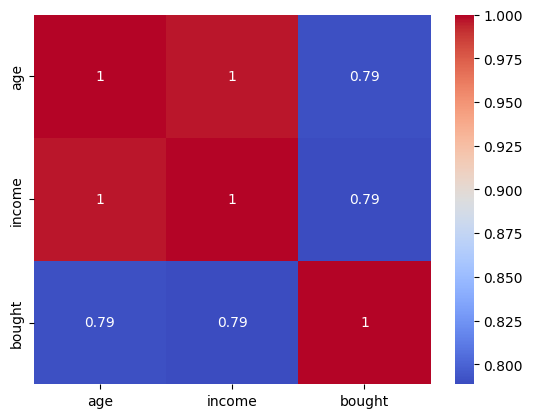

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
df = pd.DataFrame({
    "age": [20, 25, 30, 35, 40, 45, 50],
    "income": [2000, 2500, 3200, 4000, 4500, 5000, 6000],
    "bought": [0, 0, 1, 1, 1, 1, 1]  # target (binary)
})

# Compute correlation matrix
corr = df.corr()

print(corr)

# Heatmap visualization
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


👉 Interpretation: Keep features with **high correlation with target**, and drop features that are **highly correlated with each other** (multicollinearity).

# 📘 Chi-Square Test (χ² Test)

### 🔹 What is it?

* A **statistical test** used to check if **categorical features** are related to the **categorical target**.
* It answers:
  👉 *“Does this feature significantly influence the target variable?”*

---

### 🔹 Formula

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

* $O$ = **Observed frequency** (from data)
* $E$ = **Expected frequency** (if the feature and target were independent)

If χ² is **large**, it means the feature and target are **not independent** → the feature is useful.

---

### 🔹 Steps

1. Create a **contingency table** (cross-tab) between feature and target.
2. Calculate **expected frequencies**.
3. Apply χ² formula.
4. Get **p-value** → if **p < 0.05**, reject independence (feature is useful).

---

### ✅ Example (Manual Calculation)

Suppose we have a dataset:

| Gender    | Disease=Yes | Disease=No | Total   |
| --------- | ----------- | ---------- | ------- |
| Male      | 20          | 30         | 50      |
| Female    | 30          | 20         | 50      |
| **Total** | **50**      | **50**     | **100** |

* **Expected count for Male-Yes**:

$$
E = \frac{\text{Row Total} \times \text{Col Total}}{\text{Grand Total}} = \frac{50 \times 50}{100} = 25
$$

* Similarly compute for all cells.
* Then apply χ² formula.

---

### ✅ Python Example (Scikit-learn)

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest

# Sample dataset
df = pd.DataFrame({
    "gender": [0, 1, 0, 1, 0, 1, 1],   # 0=Male, 1=Female
    "smoker": [1, 0, 1, 1, 0, 0, 1],  # 0=No, 1=Yes
    "disease": [0, 1, 0, 1, 0, 1, 1]  # Target
})

X = df[["gender", "smoker"]]
y = df["disease"]

# Apply Chi-Square Test
chi_scores, p_values = chi2(X, y)

for feature, score, p in zip(X.columns, chi_scores, p_values):
    print(f"{feature}: χ² = {score:.3f}, p-value = {p:.3f}")

### ✅ Output (example)

```
gender: χ² = 1.167, p-value = 0.280
smoker: χ² = 3.857, p-value = 0.049
```

👉 Interpretation:

* `gender`: p-value > 0.05 → not significant
* `smoker`: p-value < 0.05 → significant, keep this feature

---

### 🔹 When to Use Chi-Square Test?

* Features must be **categorical (discrete)**.
* Target must also be **categorical (classification problem)**.
* If you have **numerical features**, you need to **discretize/bucketize** them first.

## **3. ANOVA F-test**

* Works for **numeric features vs categorical target**.
* Formula:

$$
F = \frac{\text{Variance between groups}}{\text{Variance within groups}}
$$

* Large $F$ → feature better separates categories.

---

✅ **Python Example: ANOVA F-test**

```python
from sklearn.feature_selection import f_classif, SelectKBest
import pandas as pd

# Example dataset
df = pd.DataFrame({
    "math_score": [60, 70, 65, 80, 85, 90, 95],
    "reading_score": [55, 65, 75, 70, 80, 85, 90],
    "passed": [0, 0, 1, 1, 1, 1, 1]  # categorical target
})

X = df[["math_score", "reading_score"]]
y = df["passed"]

# Apply ANOVA F-test
anova_scores, p_values = f_classif(X, y)

for feature, score, p in zip(X.columns, anova_scores, p_values):
    print(f"{feature}: F = {score:.3f}, p-value = {p:.3f}")
```

👉 Interpretation: Select features with **high F-score** and **low p-value**.

---

## **4. Mutual Information (MI)**

* Measures **information gain** of feature $X$ about target $Y$.

$$
I(X;Y) = \sum_x \sum_y p(x,y) \log \frac{p(x,y)}{p(x)p(y)}
$$

* MI = 0 → independent
* Higher MI → feature provides more information about target.

---

✅ **Python Example: Mutual Information**

```python
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Example dataset
df = pd.DataFrame({
    "age": [20, 25, 30, 35, 40, 45, 50],
    "income": [2000, 2500, 3200, 4000, 4500, 5000, 6000],
    "bought": [0, 0, 1, 1, 1, 1, 1]  # target
})

X = df[["age", "income"]]
y = df["bought"]

mi_scores = mutual_info_classif(X, y, discrete_features=False)

for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: MI = {score:.3f}")
```

👉 Interpretation: Keep features with **higher MI score**.

---

# 🎯 Summary of Filter Methods

| Method       | Feature Type | Target Type        | Equation / Test | Notes                         |
| ------------ | ------------ | ------------------ | --------------- | ----------------------------- |
| Correlation  | Numerical    | Numerical / Binary | Pearson’s r     | Drops multicollinear features |
| Chi-Square   | Categorical  | Categorical        | χ² test         | Needs discrete features       |
| ANOVA F-test | Numerical    | Categorical        | F-ratio         | Assumes normal distribution   |
| Mutual Info  | Mixed        | Mixed              | $I(X;Y)$        | Captures non-linear relations |

---

✅ **Best Practice**

1. Use **correlation** to remove redundant features.
2. Apply **Chi² / ANOVA** depending on categorical/numerical data.
3. Use **Mutual Information** if you expect **non-linear relations**.

Great question 🚀 Let’s dive deep into **Wrapper Feature Selection** methods.

---

# 🔎 Wrapper Feature Selection

Wrapper methods evaluate subsets of features **based on model performance**.
Unlike **filter methods** (which use statistical measures like correlation, chi-square), wrapper methods **train a model repeatedly** with different feature subsets and pick the best-performing combination.

They are more accurate but also more computationally expensive.

---

## ✨ Main Wrapper Methods

### 1. **Forward Selection**

* Start with **no features**.
* Add features one by one.
* At each step, add the feature that improves model performance the most.
* Stop when adding new features doesn’t improve results.

---

### 2. **Backward Elimination**

* Start with **all features**.
* Remove one feature at a time.
* At each step, remove the least important feature (that reduces performance the least).
* Continue until no further improvement.

---

### 3. **Recursive Feature Elimination (RFE)**

* Uses a model (e.g., Logistic Regression, Random Forest).
* Trains the model, ranks features by importance, and removes the least important one(s).
* Repeats recursively until desired number of features is reached.

👉 RFE is the most widely used wrapper method.

---

# ✅ Example: Wrapper Feature Selection (Titanic Dataset)

We’ll use **Recursive Feature Elimination (RFE)** with Logistic Regression.



In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Select useful features (some numeric + categorical)
df = titanic[["sex", "pclass", "age", "fare", "embarked", "survived"]].dropna()

# Encode categorical variables
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

X = df.drop("survived", axis=1)
y = df["survived"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=3)  # Select top 3 features
rfe = rfe.fit(X_train, y_train)

# Print selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", list(selected_features))

# 🔎 Explanation

1. **Feature Preparation**

   * Converted `sex` → numeric (male=1, female=0).
   * One-hot encoded `embarked`.

2. **Recursive Feature Elimination (RFE)**

   * Fits a Logistic Regression model.
   * Removes the least important feature each round.
   * Keeps the best 3 features.

3. **Output Example (may vary)**

```
Selected Features by RFE: ['sex', 'pclass', 'fare']
```

👉 This means that **gender, passenger class, and ticket fare** are the most important predictors of survival.

---

# ⚖️ Pros & Cons of Wrapper Methods

✅ Pros:

* Often more accurate than filter methods.
* Captures interactions between features.

❌ Cons:

* Computationally expensive (many models trained).
* Not suitable for **very high-dimensional datasets**.


# 🧩 Embedding Methods in Feature Selection

Unlike **filter** and **wrapper** methods, **embedding methods** perform **feature selection during the model training process itself**.

👉 In other words, the model **learns which features are important** as part of its optimization.

---

## 🔹 How It Works

1. **Filter methods** → use statistical tests (e.g., Chi-square, correlation).
2. **Wrapper methods** → repeatedly train & evaluate models with different subsets.
3. **Embedding methods** → the model **internally evaluates feature importance** while fitting.

The key idea:

* Add **regularization** or model-specific techniques so unimportant features get **shrunk to zero weight** or are ignored.

---

## 🔹 Examples of Embedding Methods

### 1. **LASSO Regression (L1 Regularization)**

* Adds an $L1$ penalty to the loss function:

$$
\text{Loss} = \text{MSE} + \lambda \sum_{j=1}^n |w_j|
$$

* Effect:

  * Many weights $w_j$ shrink to **exactly zero**.
  * The remaining non-zero features are **selected automatically**.

✅ Common in linear/logistic regression for feature selection.

---

### 2. **Elastic Net Regularization (L1 + L2)**

$$
\text{Loss} = \text{MSE} + \lambda_1 \sum |w_j| + \lambda_2 \sum w_j^2
$$

* Balances **sparsity (L1)** and **stability (L2)**.
* Works well when features are correlated.

---

### 3. **Tree-Based Models (Decision Trees, Random Forest, XGBoost, LightGBM)**

* Trees naturally split on the most **informative features**.
* Feature importance can be extracted from:

  * **Gini Importance** (mean decrease in impurity).
  * **Permutation Importance**.

✅ Very effective for mixed numeric/categorical data.

---

### 4. **Neural Network Embeddings**

* For categorical features (e.g., cities, products, users), NN learns **dense embeddings**.
* By analyzing embedding weights (and their contribution to output), we can assess which categorical features are important.

---

## 🔨 Code Examples

### 📌 Example 1: LASSO for Feature Selection

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
import numpy as np

# Load dataset
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Fit LASSO
lasso = Lasso(alpha=0.1)  # alpha = λ (regularization strength)
lasso.fit(X, y)

# Check feature importance
importance = pd.Series(lasso.coef_, index=X.columns)
print("Selected Features:\n", importance[importance != 0])

### 📌 Example 2: Tree-Based Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Feature importance
for name, score in zip(iris.feature_names, rf.feature_importances_):
    print(f"{name}: {score:.3f}")

## 🔎 Summary

* **Filter:** fast, independent of model.
* **Wrapper:** accurate but computationally heavy.
* **Embedding:** integrates feature selection **inside the model training**.


Perfect idea 👍 Let’s write an experiment to **demonstrate how feature selection improves regression performance**.

We’ll:

1. Create a dataset with **useful and noisy (irrelevant) features**.
2. Train a regression model **with all features**.
3. Apply **feature selection (LASSO or feature importance)**.
4. Train a regression model **with selected features**.
5. Compare the results (R² score & MSE).

---

# 📌 Code: Effect of Feature Selection on Regression

🔹 Model with ALL 100 features
R²: 0.9458013019508259
MSE: 1004.839665781173

✅ Selected features by LASSO: [ 0  1  7 16 29 51 58 65 66 73 83]

🔹 Model with SELECTED features
R²: 0.9594357887969319
MSE: 752.0573352331472


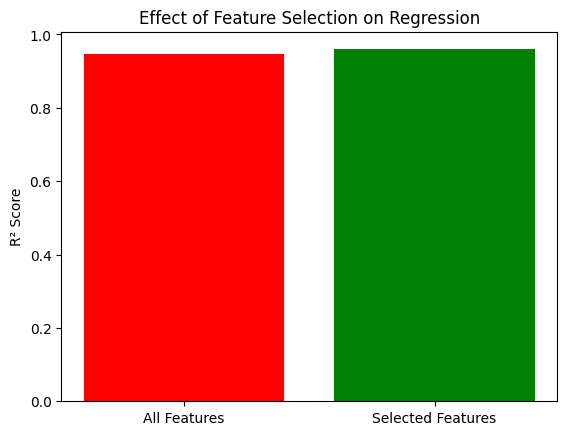

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Create dataset with MANY noisy features
X, y = make_regression(
    n_samples=500,       # fewer samples
    n_features=100,      # many features
    n_informative=5,     # only 5 are useful
    noise=25,            # add strong noise
    random_state=42
)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Linear Regression with ALL features
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
y_pred_all = lr_all.predict(X_test)

r2_all = r2_score(y_test, y_pred_all)
mse_all = mean_squared_error(y_test, y_pred_all)

print("🔹 Model with ALL 100 features")
print("R²:", r2_all)
print("MSE:", mse_all)

# 3. Feature Selection with LASSO
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train, y_train)

selected_features = np.where(lasso.coef_ != 0)[0]
print("\n✅ Selected features by LASSO:", selected_features)

# Use only selected features
X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

# 4. Linear Regression with SELECTED features
lr_sel = LinearRegression()
lr_sel.fit(X_train_sel, y_train)
y_pred_sel = lr_sel.predict(X_test_sel)

r2_sel = r2_score(y_test, y_pred_sel)
mse_sel = mean_squared_error(y_test, y_pred_sel)

print("\n🔹 Model with SELECTED features")
print("R²:", r2_sel)
print("MSE:", mse_sel)

# 5. Plot comparison
labels = ["All Features", "Selected Features"]
r2_scores = [r2_all, r2_sel]

plt.bar(labels, r2_scores, color=['red', 'green'])
plt.ylabel("R² Score")
plt.title("Effect of Feature Selection on Regression")
plt.show()


🔹 Model with ALL features
R²: 0.983675510180336  | MSE: 461.991075886421

🔹 Filter Method (Top 10 features by F-test)
R²: 0.9823153425940123  | MSE: 500.4844863104733

🔹 Wrapper Method (RFE, 10 features)
R²: 0.9852339267693492  | MSE: 417.887121362209

✅ LASSO selected features: [ 0  2  4  9 17 23 24 27 30 31 32 34 35 36 37 39 40 42 45 46 49 51 61 62
 63 65 67 73 78]

🔹 Embedded Method (LASSO)
R²: 0.9850638225636351  | MSE: 422.7011538911763


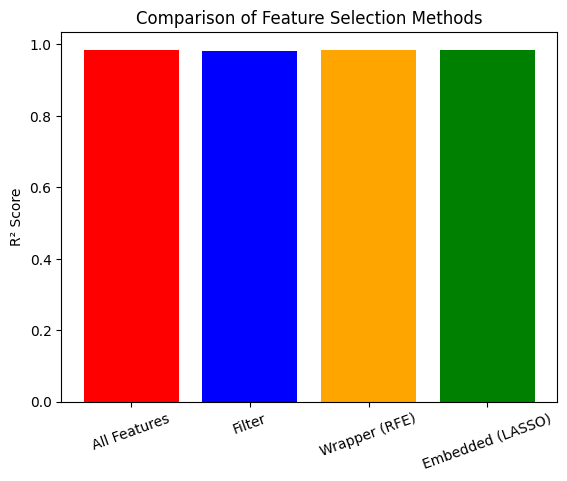

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Create dataset with many noisy features
X, y = make_regression(
    n_samples=500,
    n_features=80,       # lots of features
    n_informative=8,     # only 8 are useful
    noise=20,
    random_state=42
)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===============================
# Baseline: ALL Features
# ===============================
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
y_pred_all = lr_all.predict(X_test)

r2_all = r2_score(y_test, y_pred_all)
mse_all = mean_squared_error(y_test, y_pred_all)

print("🔹 Model with ALL features")
print("R²:", r2_all, " | MSE:", mse_all)

# ===============================
# Filter Method: SelectKBest (F-test / Correlation)
# ===============================
selector = SelectKBest(score_func=f_regression, k=10)
X_train_filter = selector.fit_transform(X_train, y_train)
X_test_filter = selector.transform(X_test)

lr_filter = LinearRegression()
lr_filter.fit(X_train_filter, y_train)
y_pred_filter = lr_filter.predict(X_test_filter)

r2_filter = r2_score(y_test, y_pred_filter)
mse_filter = mean_squared_error(y_test, y_pred_filter)

print("\n🔹 Filter Method (Top 10 features by F-test)")
print("R²:", r2_filter, " | MSE:", mse_filter)

# ===============================
# Wrapper Method: RFE (Recursive Feature Elimination)
# ===============================
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10, step=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

lr_rfe = LinearRegression()
lr_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = lr_rfe.predict(X_test_rfe)

r2_rfe = r2_score(y_test, y_pred_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)

print("\n🔹 Wrapper Method (RFE, 10 features)")
print("R²:", r2_rfe, " | MSE:", mse_rfe)

# ===============================
# Embedded Method: LASSO
# ===============================
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train, y_train)

selected_features = np.where(lasso.coef_ != 0)[0]
print("\n✅ LASSO selected features:", selected_features)

X_train_lasso = X_train[:, selected_features]
X_test_lasso = X_test[:, selected_features]

lr_lasso = LinearRegression()
lr_lasso.fit(X_train_lasso, y_train)
y_pred_lasso = lr_lasso.predict(X_test_lasso)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("\n🔹 Embedded Method (LASSO)")
print("R²:", r2_lasso, " | MSE:", mse_lasso)

# ===============================
# Compare Results
# ===============================
labels = ["All Features", "Filter", "Wrapper (RFE)", "Embedded (LASSO)"]
r2_scores = [r2_all, r2_filter, r2_rfe, r2_lasso]

plt.bar(labels, r2_scores, color=['red', 'blue', 'orange', 'green'])
plt.ylabel("R² Score")
plt.title("Comparison of Feature Selection Methods")
plt.xticks(rotation=20)
plt.show()


Great topic 👍 Let’s dive deep into **Encoding Categorical Features**, since this is a crucial step before training most machine learning models.

---

# 📘 Encoding Categorical Features

### 🔹 Why Encoding?

* Machine learning algorithms **cannot work directly with text/categorical data**.
* They need **numerical values** to perform mathematical computations (e.g., distance, dot products).
* Encoding = **transforming categories into numbers** while preserving useful information.

---

# 1️⃣ **Label Encoding**

* Each unique category is assigned an integer value.

✅ Example:

| Color | Encoded |
| ----- | ------- |
| Red   | 0       |
| Blue  | 1       |
| Green | 2       |

📌 **Problem**: Algorithms may interpret the numbers as having an **order** (Red < Blue < Green), which is **wrong for nominal data**.

👉 Works best for **ordinal features** (where order matters, e.g., "Small < Medium < Large").

In [ ]:
from sklearn.preprocessing import LabelEncoder

colors = ["Red", "Blue", "Green", "Blue", "Red"]
encoder = LabelEncoder()
encoded = encoder.fit_transform(colors)

print("Original:", colors)
print("Encoded:", encoded)

Output:

```
Original: ['Red', 'Blue', 'Green', 'Blue', 'Red']
Encoded: [2 0 1 0 2]
```

---

# 2️⃣ **One-Hot Encoding**

* Creates a new **binary column for each category**.
* Value = 1 if that category is present, else 0.

✅ Example:

| Color | Red | Blue | Green |
| ----- | --- | ---- | ----- |
| Red   | 1   | 0    | 0     |
| Blue  | 0   | 1    | 0     |
| Green | 0   | 0    | 1     |

👉 Avoids the problem of false ordering.
👉 Increases **dimensionality** if many categories.

In [ ]:
import pandas as pd

df = pd.DataFrame({"Color": ["Red", "Blue", "Green", "Blue", "Red"]})
one_hot = pd.get_dummies(df["Color"], prefix="Color")

print(pd.concat([df, one_hot], axis=1))

# 3️⃣ **Ordinal Encoding**

* Explicitly assign numbers based on **meaningful order**.

✅ Example:

```
Size: Small < Medium < Large
Encoding: Small=0, Medium=1, Large=2
```


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame({"Size": ["Small", "Large", "Medium", "Small"]})

encoder = OrdinalEncoder(categories=[["Small", "Medium", "Large"]])
encoded = encoder.fit_transform(df[["Size"]])

df["Size_encoded"] = encoded
print(df)


# 4️⃣ **Target / Mean Encoding**

* Replace each category with the **mean of target variable** for that category.
* Useful for high-cardinality features.

✅ Example (binary target):

| City     | Conversion Rate | Encoded Value |
| -------- | --------------- | ------------- |
| New York | 0.70            | 0.70          |
| Paris    | 0.30            | 0.30          |
| Tokyo    | 0.50            | 0.50          |

👉 Powerful but risky: can cause **data leakage** if not applied carefully (must use cross-validation).

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "City": ["NY", "Paris", "NY", "Tokyo", "Paris", "Tokyo"],
    "Target": [1, 0, 1, 0, 0, 1]
})

# Mean target per category
mean_encoded = df.groupby("City")["Target"].mean()
df["City_encoded"] = df["City"].map(mean_encoded)

print(df)

# 5️⃣ **Frequency / Count Encoding**

* Replace each category with the **count** or **frequency** of its appearance.

✅ Example:

| City  | Count | Encoded |
| ----- | ----- | ------- |
| NY    | 2     | 2       |
| Paris | 2     | 2       |
| Tokyo | 2     | 2       |


In [ ]:
freq_encoded = df["City"].map(df["City"].value_counts())
df["City_freq"] = freq_encoded
print(df)

# ✅ Choosing the Right Encoding

* **Label Encoding** → when categories are **ordinal**.
* **One-Hot Encoding** → when categories are **nominal** with **low cardinality**.
* **Target / Mean Encoding** → when categories are **high cardinality**.
* **Frequency Encoding** → when categories are many, and counts make sense.

# 📝 Exercise: Encoding Categorical Features (Titanic Dataset)

We will work with three categorical columns from Titanic:

* **Sex** (male/female) → Nominal
* **Embarked** (C, Q, S) → Nominal with some missing values
* **Pclass** (1, 2, 3) → Ordinal

---

## Exercise Tasks

1. Load the Titanic dataset from `seaborn`.
2. Inspect the data and check unique values in `Sex`, `Embarked`, and `Pclass`.
3. Perform:

   * **Label Encoding** on `Sex`.
   * **One-Hot Encoding** on `Embarked`.
   * **Ordinal Encoding** on `Pclass` (since 1st class > 2nd > 3rd).
4. Combine the encoded features back into the dataset.
5. Compare the shapes of the original and transformed datasets.

---

# ✅ Solution with Code & Detailed Explanation


In [3]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 1. Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Select relevant categorical columns
df = titanic[["sex", "embarked", "pclass"]].copy()
print("Original Data Sample:\n", df.head())

# -----------------------------
# 2. Check unique values
print("\nUnique values:")
print("Sex:", df["sex"].unique())
print("Embarked:", df["embarked"].unique())
print("Pclass:", df["pclass"].unique())

# -----------------------------
# 3a. Label Encoding on 'sex'
le = LabelEncoder()
df["sex_encoded"] = le.fit_transform(df["sex"])
# male=1, female=0

# -----------------------------
# 3b. One-Hot Encoding on 'embarked'
# Handle missing values by filling with 'Unknown'
df["embarked"] = df["embarked"].fillna("Unknown")
embarked_ohe = pd.get_dummies(df["embarked"], prefix="embarked")
# Creates columns like embarked_C, embarked_Q, embarked_S, embarked_Unknown

# -----------------------------
# 3c. Ordinal Encoding on 'pclass'
# Define the order: 1 < 2 < 3 (1 = luxury, 3 = lowest class)
ord_enc = OrdinalEncoder(categories=[[1, 2, 3]])
df["pclass_encoded"] = ord_enc.fit_transform(df[["pclass"]])

# -----------------------------
# 4. Combine Encoded Features
encoded_df = pd.concat([df, embarked_ohe], axis=1)

print("\nTransformed Data Sample:\n", encoded_df.head())

# -----------------------------
# 5. Compare Shapes
print("\nOriginal Shape:", titanic[["sex", "embarked", "pclass"]].shape)
print("Transformed Shape:", encoded_df.shape)

Original Data Sample:
       sex embarked  pclass
0    male        S       3
1  female        C       1
2  female        S       3
3  female        S       1
4    male        S       3

Unique values:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]

Transformed Data Sample:
       sex embarked  pclass  sex_encoded  pclass_encoded  embarked_C  \
0    male        S       3            1             2.0       False   
1  female        C       1            0             0.0        True   
2  female        S       3            0             2.0       False   
3  female        S       1            0             0.0       False   
4    male        S       3            1             2.0       False   

   embarked_Q  embarked_S  embarked_Unknown  
0       False        True             False  
1       False       False             False  
2       False        True             False  
3       False        True             False  
4       False        True             False  

O

# 🔎 Explanation of Each Step

### 1. **Load & Inspect**

We only take **sex, embarked, pclass** from Titanic.

### 2. **Unique Values**

Check categories to know what we’re encoding.

* `sex`: \["male", "female"]
* `embarked`: \["C", "Q", "S", NaN]
* `pclass`: \[1, 2, 3]

### 3a. **Label Encoding (`sex`)**

* Male → 1
* Female → 0
  👉 Good because `sex` is binary.

### 3b. **One-Hot Encoding (`embarked`)**

* Converts `C, Q, S, Unknown` → 4 binary columns.
  👉 Avoids false ordering between ports.

### 3c. **Ordinal Encoding (`pclass`)**

* We define: 1 (luxury) < 2 < 3 (cheapest).
* Encoded as \[0, 1, 2].

### 4. **Combine**

All encoded features are merged back into the dataframe.

### 5. **Shape**

* Original: 891 × 3
* Transformed: 891 × (1 label + 4 one-hot + 1 ordinal + original cols)

---

# 🎯 Final Output Example (first 5 rows)

```
     sex embarked  pclass  sex_encoded  pclass_encoded  embarked_C  embarked_Q  embarked_S  embarked_Unknown
0    male       S       3            1             2.0          0          0          1                0
1  female       C       1            0             0.0          1          0          0                0
2  female       S       3            0             2.0          0          0          1                0
3  female       S       1            0             0.0          0          0          1                0
4    male       S       3            1             2.0          0          0          1                0
```

